# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Kelly Bromley
[Project 6 - Web Scraping, NLP (Requests, BeautifulSoup, and spaCy) & Engage](https://github.com/K-Bromley/module_06_web_scraping)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [55]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                   Version
------------------------- --------------
annotated-types           0.7.0
anyio                     4.6.2.post1
appnope                   0.1.4
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.2.0
blis                      1.0.1
catalogue                 2.0.10
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.4.0
click                     8.1.7
cloudpathlib              0.20.0
comm                      0.2.2
confection                0.1.5
contourpy                 1.3.1
cycler                    0.12.1
cymem                     2.0.8
debugpy                   1.8.8
decorator                 5.1.1
defusedxml                0.7.1
en_core_web_sm            3.8.0
executing 

## Task 1
1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [56]:
# Fetching data from URL
response = requests.get("https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/")
contents = response.text

# Write contents to .pkl file
with open('task_01_article_html.pkl', 'wb') as file:
    pickle.dump(contents, file)

## Task 2
2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [57]:
# Import BeautifulSoup
from bs4 import BeautifulSoup

#Load pkl file and parse HTML contents via BeautifulSoup
with open('task_01_article_html.pkl', 'rb') as file:
    contents = pickle.load(file)

soup = BeautifulSoup(contents, 'html.parser')

# Print Article Contents
print(soup.get_text())

















How Laser Headlights Work | Hackaday






































































Skip to content






Hackaday


Primary Menu

Home
Blog
Hackaday.io
Tindie
Hackaday Prize
Submit
About


Search for:



 March 27, 2021 






How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype 

## Task 3
3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

5 Common Tokens in the Article:
The token comment has a frequency of 136
The token march has a frequency of 133
The token 2021 has a frequency of 133
The token says has a frequency of 132
The token report has a frequency of 130


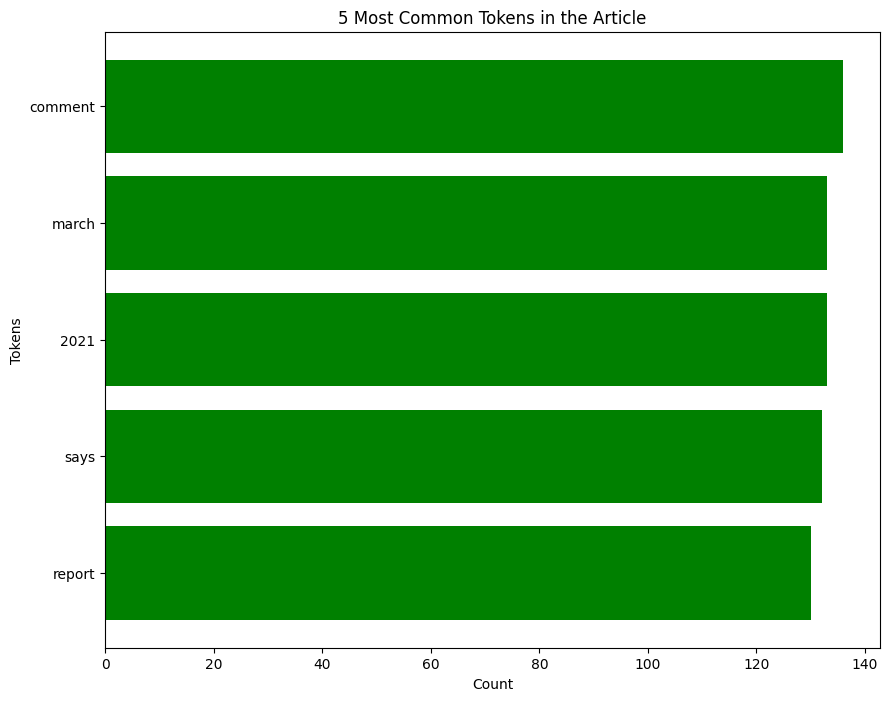

In [58]:
# spaCy pipeline load
nlp = spacy.load("en_core_web_sm")

# Article text from file
article = nlp(soup.get_text())

# Filtering out punctuation, stopwords, and whitespace as requested
tokens = [token.text.lower() for token in article if not token.is_punct and not token.is_stop and not token.is_space]

# 5 Common Tokens
token_freq = Counter(tokens).most_common(5)

# Print 5 Common tokens and frequencies
print("5 Common Tokens in the Article:")
for token, freq in token_freq:
    print(f"The token {token} has a frequency of {freq}")



# Bar chart for better representation and for fun.
tokens, frequencies = zip(*token_freq)

plt.figure(figsize=(10, 8))
plt.barh(tokens, frequencies, color='green')
plt.xlabel('Count')
plt.ylabel('Tokens')
plt.title('5 Most Common Tokens in the Article')
plt.gca().invert_yaxis()
plt.show()


## Task 4
4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

5 Most Common Lemmas in the Article:
The lemma comment has a frequency of 157
The lemma say has a frequency of 134
The lemma march has a frequency of 133
The lemma 2021 has a frequency of 133
The lemma report has a frequency of 130


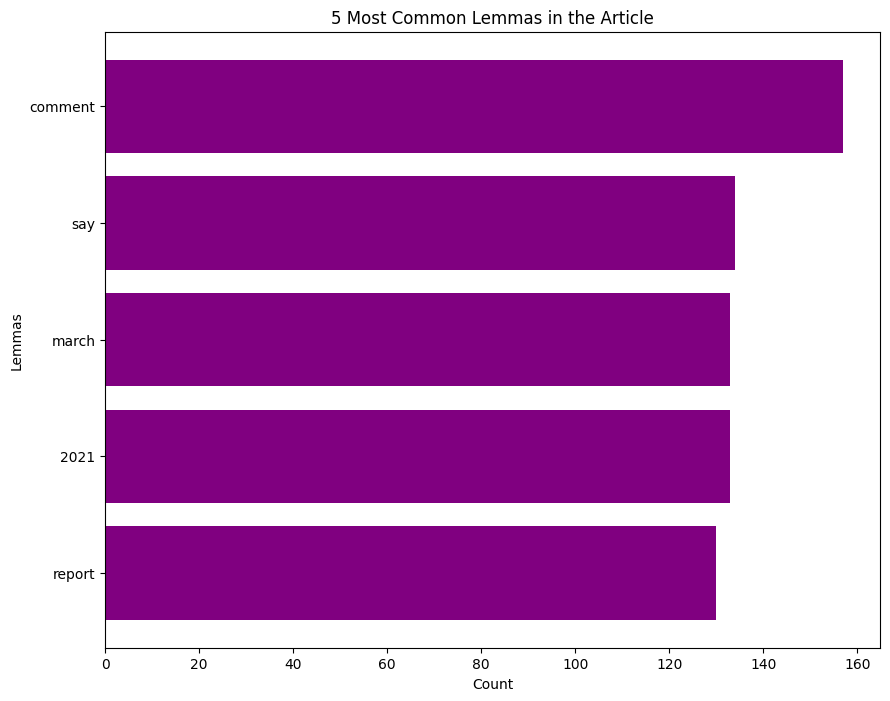

In [59]:
# Get Lemmas and filter out punctuation, stopwords, and whitespace as requested.
lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

# Get the 5 most common lemmas
lemma_freq = Counter(lemmas).most_common(5)

# Print Lemmas with their Frequencies
print("5 Most Common Lemmas in the Article:")
for lemma, freq in lemma_freq:
    print(f"The lemma {lemma} has a frequency of {freq}")

# Bar chart for better representation and for fun.
lemmas, frequencies = zip(*lemma_freq)

plt.figure(figsize=(10, 8))
plt.barh(lemmas, frequencies, color='purple')
plt.xlabel('Count')
plt.ylabel('Lemmas')
plt.title('5 Most Common Lemmas in the Article')
plt.gca().invert_yaxis()
plt.show()

## Task 5
5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [60]:
def score_sentence_by_token(sentence, interesting_tokens):
    # Get Interesting Token Count
    tokens = [token.text.lower() for token in nlp(sentence) if not token.is_punct and not token.is_stop and not token.is_space]
    interesting_count = sum(1 for token in tokens if token in interesting_tokens)
    score = interesting_count / len(tokens) if tokens else 0
    return score

def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Get Interesting Lemma Count
    lemmas = [token.lemma_.lower() for token in nlp(sentence) if not token.is_punct and not token.is_stop and not token.is_space]
    interesting_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    score = interesting_count / len(lemmas) if lemmas else 0
    return score

# Testing with First Sentence in Article
first_sentence = list(doc.sents)[0].text
interesting_tokens = [token for token, _ in token_freq]
interesting_lemmas = [lemma for lemma, _ in lemma_freq]

token_score = score_sentence_by_token(first_sentence, interesting_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, interesting_lemmas)

# Print Scores
print(f"Token score for the first sentence: {token_score}")
print(f"Lemma score for the first sentence: {lemma_score}")

Token score for the first sentence: 0.12195121951219512
Lemma score for the first sentence: 0.14634146341463414


## Task 6
6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

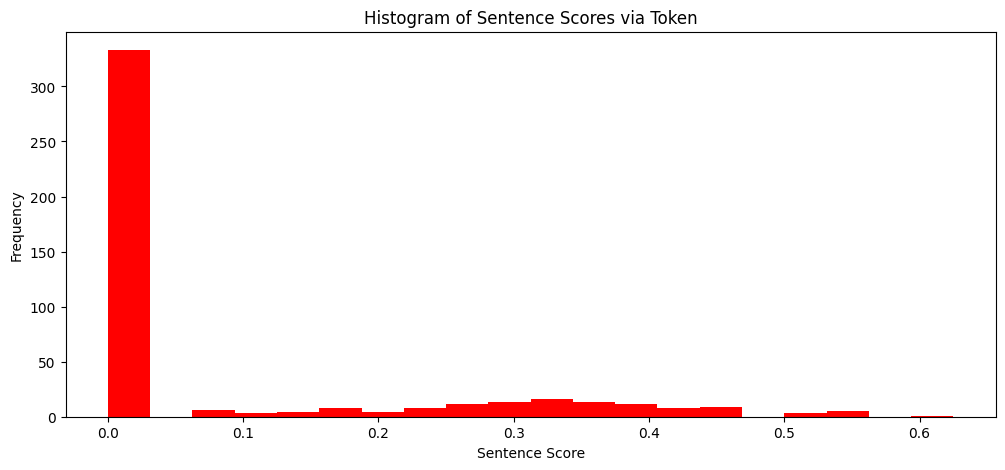

Min score: 0.0
Max score: 0.625
Number of scores: 458


In [66]:
# Create List of Sentence Scores
sentence_scores = [score_sentence_by_token(sentence.text, interesting_tokens) for sentence in doc.sents]

# Histogram of Sentence scores
plt.figure(figsize=(12, 5))
plt.hist(sentence_scores, bins=20, color='red')
plt.title('Histogram of Sentence Scores via Token')
plt.xlabel('Sentence Score')
plt.ylabel('Frequency')
plt.show()

print(f"Min score: {min(sentence_scores)}")
print(f"Max score: {max(sentence_scores)}")
print(f"Number of scores: {len(sentence_scores)}")

## Task 7
7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

## Task 8
8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).